### Import Libraries

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import ndimage
import matplotlib.image as mpimg

### Fucntions

In [2]:
def Noise_Reduction (img):
    img = cv.GaussianBlur(img,(5,5),0.4) #5x5 filter with a sigma = 0.4
    return img

In [3]:
## Gradient Intensity

# Gradient intensity helps detect edge intensity and direction, since
# edges correspond to a change of pixel intensity.

def Gradient_Intensity(img):
    wx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    wy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    
    sobelx = ndimage.filters.convolve(img, wx) # Convolution of the original image and X sobel kernel
    sobely = ndimage.filters.convolve(img, wy) # Convolution of the original image and Y sobel kernel
    
    g = np.sqrt(np.square(sobelx) + np.square(sobely))
    g *= 255.0 / g.max()

    theta = np.arctan2(sobely, sobelx)
    theta = np.rad2deg(g)
    theta += 180
    
    return (g, theta)

In [4]:
# Non-maximum supression

def non_maximum_supression(img, Ang):
    Row, Col = img.shape
    GrdIntMtx = np.zeros(img.shape) # Gradient intensity matrix of zeros

    for i in range(1,Row-1):
        for j in range(1,Col-1):
          angle = Ang[i,j]   
          
          if (0 <= angle < 22.5) or (337.5 <= angle <= 180):
            old_pix = img[i,j-1]
            new_pix = img[i,j+1]

          elif (22.5 <= angle < 67.5) or (202.5 <= angle < 247.5):
            old_pix = img[i+1,j-1]
            new_pix = img[i-1,j+1]

          elif (67.5 <= angle < 112.5) or (247.5 <= angle < 292.5):
            old_pix = img[i-1,j]
            new_pix = img[i+1,j]

          else:
            old_pix = img[i-1,j-1]
            new_pix = img[i+1,j+1]            

          if img[i,j] >= old_pix and img[i,j] >= new_pix:
            GrdIntMtx[i,j] = img[i,j]

    return GrdIntMtx

In [5]:
# Hysteresis Thresholding

## Double Thresholding

def Double_Thresholding(img,maxth,minth):
    
    output_DS = np.zeros(img.shape)
    strongpixel = 255
    weakpixel = 50
    strongpix_R,strongpix_C = np.where(img>=maxth)
    weakpix_R,weakpix_C = np.where((img<=maxth)&(img>=minth))

    output_DS[strongpix_R,strongpix_C] = strongpixel
    output_DS[weakpix_R,weakpix_C] = weakpixel
    
    return (output_DS)

## Hysteresis Thresholding

def hysteresis(img):
    
    weakpixel = 50
    strongpixel = 255    
    R, Col = img.shape
    
    T_to_B = img.copy()

    for i in range(1, R):
        for j in range(1,Col):
            if T_to_B[i,j] == weakpixel:
                if T_to_B[i, j+1] == strongpixel or T_to_B[i, j-1] == strongpixel or T_to_B[i-1, j] == strongpixel or T_to_B[i+1, j] == strongpixel or T_to_B[i-1, j-1] == strongpixel or T_to_B[i+1, j-1] == strongpixel or T_to_B[i-1, j+1] == strongpixel or T_to_B[i+1, j+1] == strongpixel:
                  T_to_B[i, j] = strongpixel
                else:
                    T_to_B[i, j] = 0

    B_to_T = img.copy()

    for i in range(R-1,0,-1):
        for j in range(Col-1,0,-1):
            if B_to_T[i,j] == weakpixel:
                if B_to_T[i, j+1] == strongpixel or B_to_T[i, j-1] == strongpixel or B_to_T[i-1, j] == strongpixel or B_to_T[i+1, j] == strongpixel or B_to_T[i-1, j-1] == strongpixel or B_to_T[i+1, j-1] == strongpixel or B_to_T[i-1, j+1] == strongpixel or B_to_T[i+1, j+1] == strongpixel:
                  B_to_T[i, j] = strongpixel
                else:
                    B_to_T[i, j] = 0
    
    R_to_L = img.copy()

    for i in range(1,R):
      for j in range(Col-1,0,-1):
            if R_to_L[i,j] == weakpixel:
                if R_to_L[i, j+1] == strongpixel or R_to_L[i, j-1] == strongpixel or R_to_L[i-1, j] == strongpixel or R_to_L[i+1, j] == strongpixel or R_to_L[i-1, j-1] == strongpixel or R_to_L[i+1, j-1] == strongpixel or R_to_L[i-1, j+1] == strongpixel or R_to_L[i+1, j+1] == strongpixel:
                  R_to_L[i, j] = strongpixel
                else:
                    B_to_T[i, j] = 0

    L_to_R = img.copy()

    for i in range(R-1,0,-1):
      for j in range(1, Col):
            if L_to_R[i,j] == weakpixel:
                if L_to_R[i, j+1] == strongpixel or L_to_R[i, j-1] == strongpixel or L_to_R[i-1, j] == strongpixel or L_to_R[i+1, j] == strongpixel or L_to_R[i-1, j-1] == strongpixel or L_to_R[i+1, j-1] == strongpixel or L_to_R[i-1, j+1] == strongpixel or L_to_R[i+1, j+1] == strongpixel:
                  L_to_R[i, j] = strongpixel
                else:
                    L_to_R[i, j] = 0    

    FinalHyst = T_to_B + B_to_T + R_to_L + L_to_R
    FinalHyst [FinalHyst>strongpixel] = strongpixel

    return FinalHyst

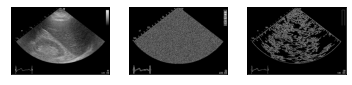

In [6]:
# Load the original image
image_og = cv.imread(r"/content/liver_id_8_image_1.png")
image = cv.cvtColor(image_og,cv.COLOR_BGR2GRAY)

# Run the image through the manually constructed canny edge detection algorithm
Noise_R = Noise_Reduction(image) # Noise Reduction
#H_EQ = cv.equalizeHist(Noise_R) # Histogram Equalization
#plt.imshow(Noise_R, cmap='gray')
Gradient,Theta = Gradient_Intensity(Noise_R) # Gradient Computation 
NonMaxSupression = non_maximum_supression(Gradient,Theta) # Non-Maximal Supression
DoubleThresh = Double_Thresholding(NonMaxSupression,4,1) # Double Thresholding
EdgeImg = hysteresis(DoubleThresh) # Hysteresis

# Run the image through OpenCV's algorithm
imageCopy = cv.imread(r"/content/liver_id_8_image_1.png")
imageCopy = cv.cvtColor(imageCopy,cv.COLOR_BGR2GRAY)
ifnal = cv.Canny(imageCopy,50,255)

plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
# plt.title('Healthy Liver Ultrasound Scan')
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,2)
plt.imshow(EdgeImg, cmap='gray')
# plt.title('Manually Constructed Canny Edge Detector using a 5x5 Kernel')
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,3)
plt.imshow(ifnal, cmap ='gray')
# plt.title('Canny Edge Detector using OpenCV Library')
plt.xticks([])
plt.yticks([])

images_dir = '/content/'
plt.savefig(f"{images_dir}/Healthy_Liver.png", bbox_inches="tight")

plt.show()



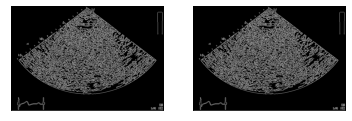

In [7]:
## Comparing the edges of healthy vs fatty

# Run the image through OpenCV's algorithm
imageCopy = cv.imread(r"/content/liver_id_8_image_1.png")
imageCopy = cv.cvtColor(imageCopy,cv.COLOR_BGR2GRAY)
Noise_R = Noise_Reduction(imageCopy) # Noise Reduction
H_EQ = cv.equalizeHist(Noise_R) # Histogram Equalization
ifnal = cv.Canny(H_EQ,50,255)

# Run the image through OpenCV's algorithm
imageCopyf = cv.imread(r"/content/liver_id_32_image_1.png")
imageCopyf = cv.cvtColor(imageCopyf,cv.COLOR_BGR2GRAY)
Noise_Rf = Noise_Reduction(imageCopyf) # Noise Reduction
H_EQf = cv.equalizeHist(Noise_R) # Histogram Equalization
ifnalf = cv.Canny(H_EQf,50,255)

plt.subplot(1,2,1)
plt.imshow(ifnal, cmap='gray')
# plt.title('Healthy Liver Ultrasound Scan')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(ifnalf, cmap='gray')
# plt.title('Fatty Liver Ultrasound Scan')
plt.xticks([])
plt.yticks([])

images_dir = '/content/'
plt.savefig(f"{images_dir}/Healthy_v_fatty_LiverHE.png", dpi=1200, bbox_inches="tight")

plt.show()

Histogram Equalization makes it worse